In [2]:
import os
import sys
sys.path.append('../../')   ## 최상위 디렉토리를 Juneer_deeplearning_set으로 변경
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import gzip
import pickle
from utils.log import Logger
import time
import matplotlib.pyplot as plt

In [3]:
with gzip.open('./super_MAIN.pickle', 'rb') as f:
    ori_data = pickle.load(f)

# ori_data[111121][['SO2', 'PM10', 'PM25']].head()
# result = 0
# for key in ori_data.keys():
#     result += (ori_data[key].loc[:, 'O3_CODE'] == 1).sum()

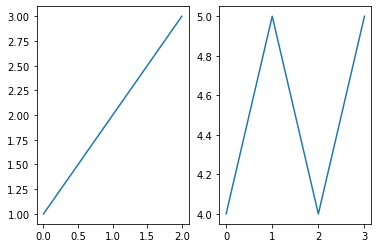

In [7]:
fig, axes = plt.subplots(1, 2)
axes[0].plot([1,2,3])
axes[1].plot([4,5,4,5]);

# 111121 측정소에서 실험 진행

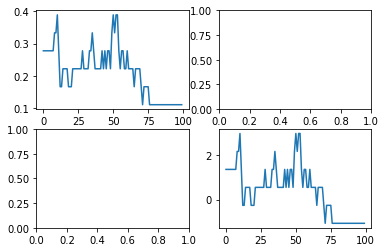

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

elements_name = ['SO2', 'CO', 'O3', 'NO', 'NO2', 'NOX', 'PM10', 'PM25']

data = ori_data[111121][elements_name]

mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()

mm_scaler.fit(data)
st_scaler.fit(data)

mm_data = mm_scaler.transform(data)
st_data = st_scaler.transform(data)

fig, axes = plt.subplots(2, 2)
axes[0][0].plot(mm_data[:100, 0])
axes[1][1].plot(st_data[:100, 0])

# plt.plot(mm_data[:100, 0])

## MinMaxScaler

- `scaler.data_max_`: 각 feature의 max값 출력
- `scaler.transform`: 스케일링 진행

In [10]:
scaler.data_max_

array([1.80e-02, 2.00e+00, 1.78e-01, 2.28e-01, 1.00e-01, 3.23e-01,
       2.96e+02, 1.49e+02])

In [14]:
min_max_data = scaler.transform(ori_data[111121][elements_name])

### Matplot을 활용한 시각화 진행

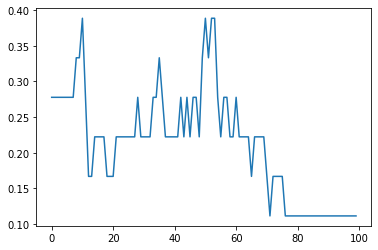

In [16]:
plt.plot(min_max_data[0:100, 0])

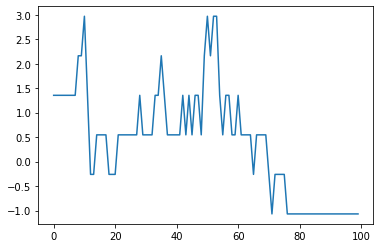

In [23]:
st_scaler = StandardScaler()

st_scaler.fit(data)
st_data = st_scaler.transform(data)

plt.plot(st_data[:100, 0])

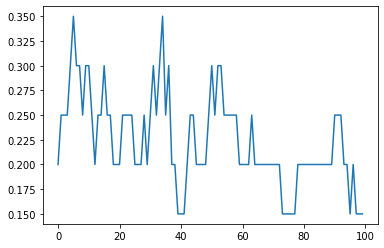

In [17]:
plt.plot(min_max_data[0:100, 1])

In [127]:
elements_name = ['SO2', 'CO', 'O3', 'NO', 'NO2', 'NOX', 'PM10', 'PM25']

# index 따로 설정 안해서 그냥 정수형으로 초기화 되게
df = pd.DataFrame(data=[[0]*8 for _ in range(10)])
df = df.transpose()
# (ori_data[111121].loc[:, [name + '_CODE' for name in elements_name]]== 0).sum().reset_index(drop=True)

for code in range(0, 10):
    for key in ori_data.keys():
        df[code] += (ori_data[key].loc[:, [name + '_CODE' for name in elements_name]]== code).sum().reset_index(drop=True)

df.index=elements_name
df

,0,1,2,3,4,5,6,7,8,9
SO2,6169775,16090,234,16697,0,1009,1807,0,180971,0
CO,6159156,3124,301,22632,0,1200,2686,0,197484,0
O3,6211576,983,107,1334,0,1656,109,0,170465,70
NO,6231220,3962,83,16768,0,54,183,2533,128940,143
NO2,6229879,3685,97,12175,0,225,183,2901,135076,143
NOX,6236715,3475,83,12282,0,54,183,3055,128350,143
PM10,6207574,1551,960,0,2504,204,84,0,173706,0
PM25,5784816,5881,308,30,2452,193,957,0,591946,0


In [130]:
df = df.transpose()

In [138]:
df.head()

,SO2,CO,O3,NO,NO2,NOX,PM10,PM25
0,6169775,6159156,6211576,6231220,6229879,6236715,6207574,5784816
1,16090,3124,983,3962,3685,3475,1551,5881
2,234,301,107,83,97,83,960,308
3,16697,22632,1334,16768,12175,12282,0,30
4,0,0,0,0,0,0,2504,2452


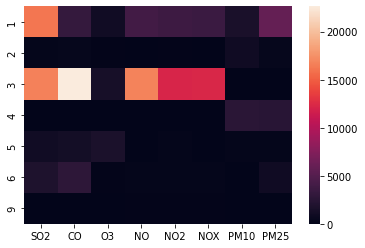

In [156]:
import seaborn as sns
# df.iloc[1:, 8]
# df.head()
val = pd.concat([df.iloc[1:7, :], df.iloc[9:, :]])
sns.heatmap(val);
# df.iloc[:7, :]
# df.iloc[9:, :]

In [118]:
dt = pd.DataFrame(index=['SO2', 'PM', 'CO'], data=[[0] * 3 for _ in range(3)])

dt[0]

SO2    0
PM     0
CO     0
Name: 0, dtype: int64

In [126]:
pd.Series([5, 5, 5], index=['SO2', 'PM', 'CO']) + dt[0]

SO2    5
PM     5
CO     5
dtype: int64

In [91]:
elements_name = ['SO2', 'CO', 'O3', 'NO', 'NO2', 'NOX', 'PM10', 'PM25']

df = pd.DataFrame(index=list(range(0, 10)), columns = elements_name)


# df = pd.DataFrame()
# print(type(result))
# print((ori_data[key].loc[:, [name + '_CODE' for name in elements_name]]== 0).sum().head())
# print(type((ori_data[key].loc[:, [name + '_CODE' for name in elements_name]]== 0).sum()))
# print(result + (ori_data[key].loc[:, [name + '_CODE' for name in elements_name]]== 0).sum())

for code in range(0, 10):
    result = pd.Series(index=[name + '_CODE' for name in elements_name], data=[0.0] * 8)
    for key in ori_data.keys():
        result += (ori_data[key].loc[:, [name + '_CODE' for name in elements_name]]== code).sum()

    df[code] = result
df

,0,1,2,3,4,5,6,7,8,9
SO2_CODE,6169775.0,16090.0,234.0,16697.0,0.0,1009.0,1807.0,0.0,180971.0,0.0
CO_CODE,6159156.0,3124.0,301.0,22632.0,0.0,1200.0,2686.0,0.0,197484.0,0.0
O3_CODE,6211576.0,983.0,107.0,1334.0,0.0,1656.0,109.0,0.0,170465.0,70.0
NO_CODE,6231220.0,3962.0,83.0,16768.0,0.0,54.0,183.0,2533.0,128940.0,143.0
NO2_CODE,6229879.0,3685.0,97.0,12175.0,0.0,225.0,183.0,2901.0,135076.0,143.0
NOX_CODE,6236715.0,3475.0,83.0,12282.0,0.0,54.0,183.0,3055.0,128350.0,143.0
PM10_CODE,6207574.0,1551.0,960.0,0.0,2504.0,204.0,84.0,0.0,173706.0,0.0
PM25_CODE,5784816.0,5881.0,308.0,30.0,2452.0,193.0,957.0,0.0,591946.0,0.0


In [97]:
(ori_data[key].loc[:, [name + '_CODE' for name in elements_name]]== code).sum()

pandas.core.series.Series

In [20]:
df = pd.DataFrame(index=elements_name, columns=list(range(1, 10)), data=0)
df.fillna(0)
df

,1,2,3,4,5,6,7,8,9
SO2,0,0,0,0,0,0,0,0,0
CO,0,0,0,0,0,0,0,0,0
O3,0,0,0,0,0,0,0,0,0
NO,0,0,0,0,0,0,0,0,0
NO2,0,0,0,0,0,0,0,0,0
NOX,0,0,0,0,0,0,0,0,0
PM10,0,0,0,0,0,0,0,0,0
PM25,0,0,0,0,0,0,0,0,0


In [3]:
result

983